<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/05_03_vgg_feature_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 5-3 : VGG Model Feature Maps**

## **Import Module**

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

## **Load VGG16 model**

In [0]:
from  tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

model_vgg = vgg16.VGG16(weights="imagenet")

model_vgg.summary()

553467904/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [0]:
# summarize filter shapes
for i, layer in enumerate(model_vgg.layers):
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue    # get filter weights

  filters, biases = layer.get_weights()
  print(i,': ', layer.name, filters.shape)

1 :  block1_conv1 (3, 3, 3, 64)
2 :  block1_conv2 (3, 3, 64, 64)
4 :  block2_conv1 (3, 3, 64, 128)
5 :  block2_conv2 (3, 3, 128, 128)
7 :  block3_conv1 (3, 3, 128, 256)
8 :  block3_conv2 (3, 3, 256, 256)
9 :  block3_conv3 (3, 3, 256, 256)
11 :  block4_conv1 (3, 3, 256, 512)
12 :  block4_conv2 (3, 3, 512, 512)
13 :  block4_conv3 (3, 3, 512, 512)
15 :  block5_conv1 (3, 3, 512, 512)
16 :  block5_conv2 (3, 3, 512, 512)
17 :  block5_conv3 (3, 3, 512, 512)


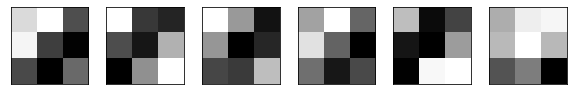

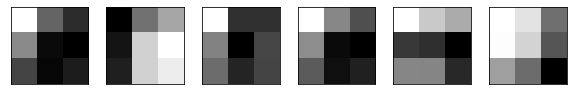

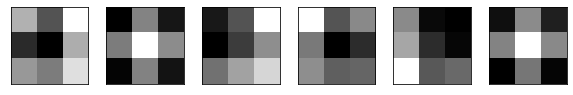

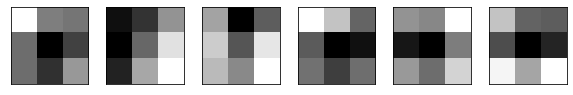

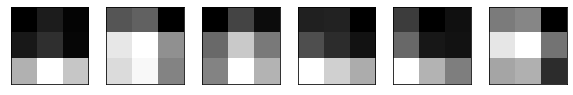

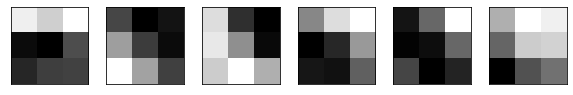

In [0]:
# cannot easily visualize filters lower down
# retrieve weights from the second hidden layer
filters, biases = model_vgg.layers[2].get_weights()
# -----											----------

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)   
# plot first few filters
n_filters = 6
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	plt.figure(figsize=(10,10))	# set figure size
	for j in range(6):
		p_num = i*n_filters + j
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, n_filters, p_num+1)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
# show the figure
plt.show()

### **Mount drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Load image**

[[[[ 75.061      43.221      -0.6800003]
   [ 81.061      46.221       4.3199997]
   [ 82.061      49.221       7.3199997]
   ...
   [104.061      68.221      15.32     ]
   [100.061      64.221      12.32     ]
   [ 97.061      59.221      12.32     ]]

  [[ 79.061      46.221       4.3199997]
   [ 84.061      49.221       6.3199997]
   [ 86.061      55.221      11.32     ]
   ...
   [107.061      71.221      18.32     ]
   [105.061      69.221      17.32     ]
   [101.061      64.221      15.32     ]]

  [[ 82.061      49.221       7.3199997]
   [ 86.061      51.221       8.32     ]
   [ 87.061      55.221      11.32     ]
   ...
   [111.061      74.221      21.32     ]
   [107.061      71.221      19.32     ]
   [103.061      67.221      15.32     ]]

  ...

  [[  5.060997   -8.778999  -13.68     ]
   [  5.060997  -11.778999   -6.6800003]
   [  5.060997   -7.7789993  -8.68     ]
   ...
   [ 10.060997   15.221001    7.3199997]
   [ 26.060997   23.221       3.3199997]
   [ 54.060997  

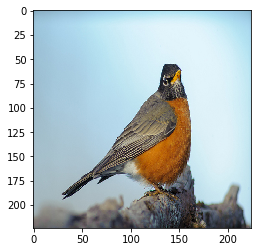

In [0]:
# set test file path
bird_file_path = '/content/drive/Shared drives/scsa_2019_e/z_data/'

# load the image with the required shape
img = image.load_img(bird_file_path+'bird.jpg', target_size=(224, 224))
# check image
plt.imshow(img)

# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel for the vgg)
img = vgg16.preprocess_input(img)

print(img)


### **n x n ploting function**

In [0]:
# plot n x n images
def square(imgs, n):
  img_num = n
  plt.figure(figsize=(10,10))
  for i in range(n):
    for j in range(n):
      p_num = i*n + j         
      # specify subplot and turn of axis
      ax = plt.subplot(n, n, p_num+1)   # pic position num: 1 ~ 64
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(imgs[0, :, :, p_num], cmap='gray')
  # show the figure
  plt.show()

## **Visualize feature maps of first conv layer**

In [0]:
model_vgg.layers[1].output

<tf.Tensor 'block1_conv1/Identity:0' shape=(None, 224, 224, 64) dtype=float32>

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
['block1_conv1']


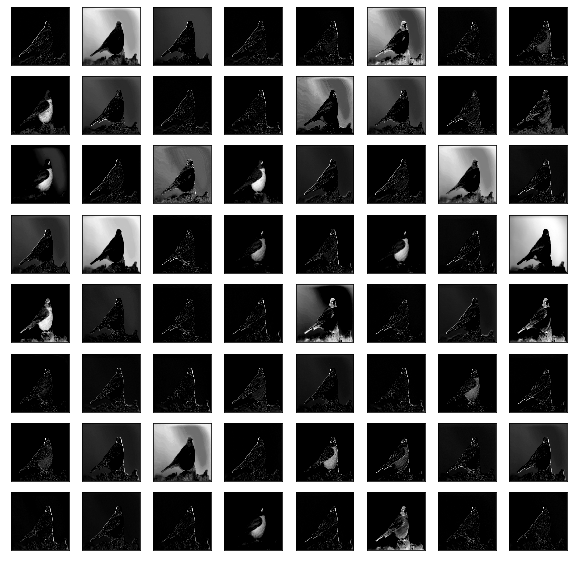

In [0]:
# plot feature map of first conv layer for given image

# redefine model to output right after the first hidden layer
model = Model(inputs=model_vgg.inputs, outputs=model_vgg.layers[1].output)
model.summary()
# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
print(model.output_names)
square(feature_maps, 8)

## **Visualize feature maps output from each block in the VGG model**

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

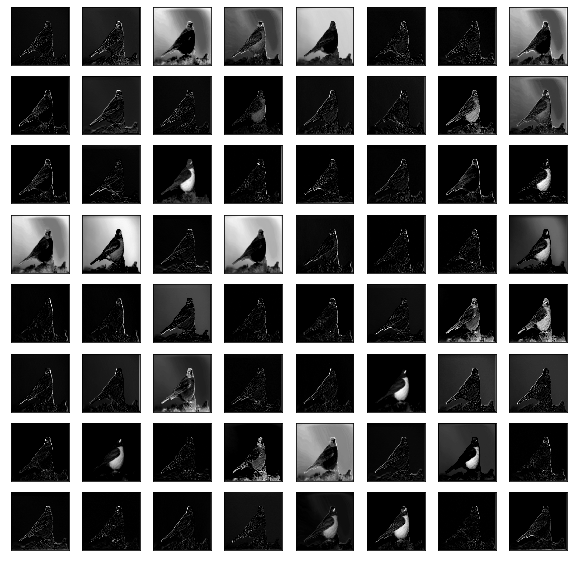

block2_conv2


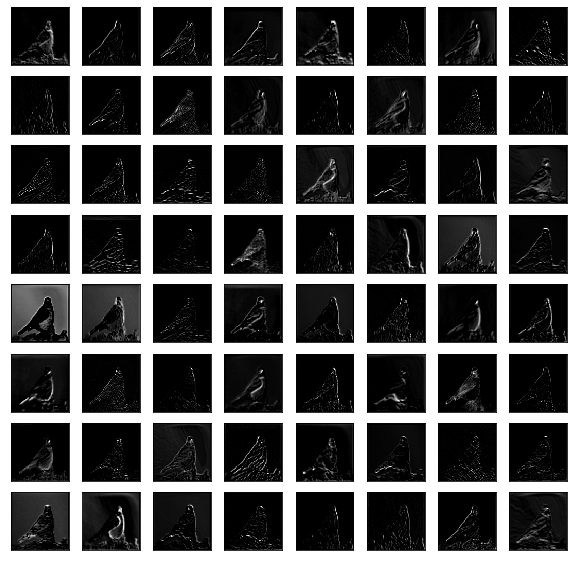

block3_conv3


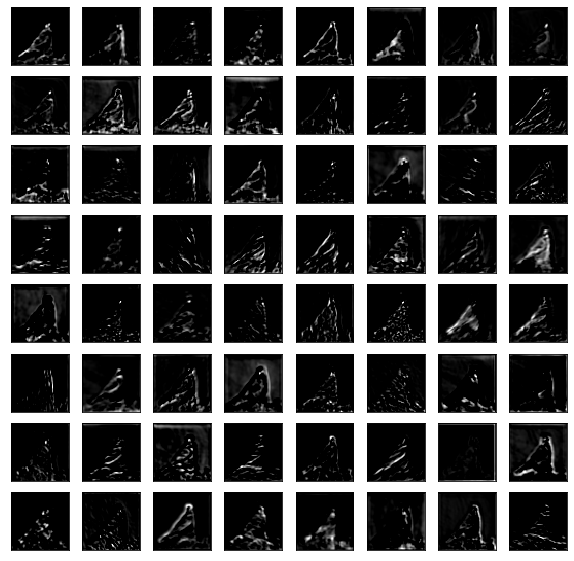

block4_conv3


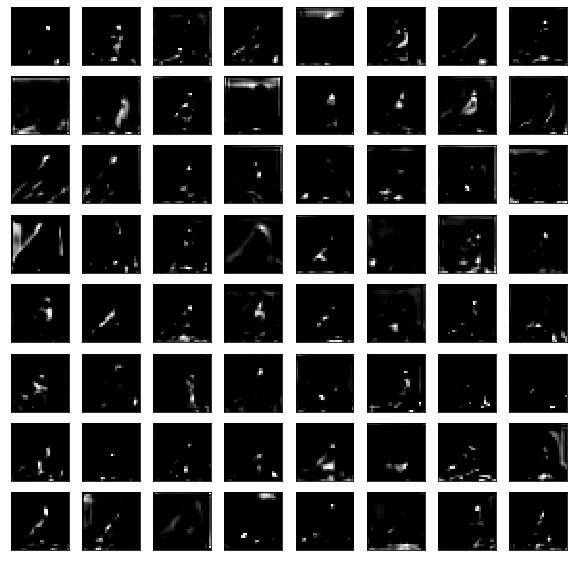

block5_conv3


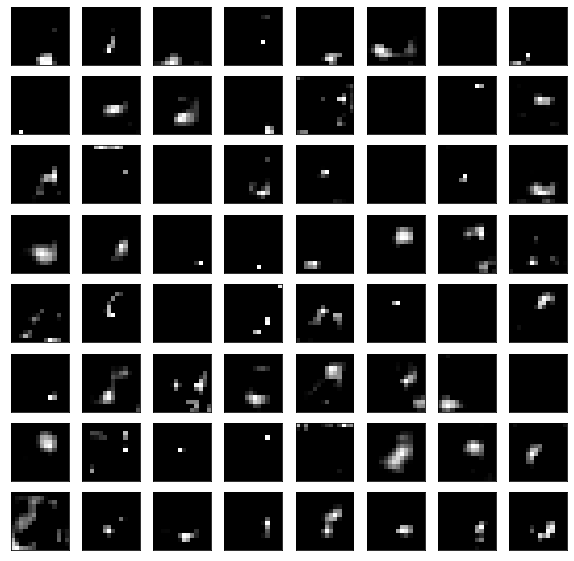

In [0]:
# visualize feature maps output from each block in the vgg model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model_vgg.layers[i].output for i in ixs]
fm_model = Model(inputs=model_vgg.inputs, outputs=outputs)
fm_model.summary()
# get feature map for first hidden layer
feature_maps = fm_model.predict(img)
# get feature maps names
layers_names = fm_model.output_names
# plot the output from each block
for i, fmap in enumerate(feature_maps):
  print(layers_names[i])
  square(fmap, 8)

## **실습 과제**

### 과제 1 `tensorflow.keras.applications.`에서 제공되는 모델들을 알아보자
#### -- VGG-19에서 feature map들을 모두 출력해서 비교해 보자 

In [0]:
"""
vgg16은 이미 있으니까!! (위)
vgg19, resnet을 활용해서 학습 및 filter map, feature map을 그려보자!!
"""



>> ### vgg19








In [0]:
from  tensorflow.keras.applications import vgg19

model_vgg19 = vgg19.VGG19(weights="imagenet")

model_vgg19.summary()

574717952/574710816 [==============================] - 21s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [0]:
# summarize filter shapes
for i, layer in enumerate(model_vgg19.layers):
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue    # get filter weights

  filters, biases = layer.get_weights()
  print(i,': ', layer.name, filters.shape)

1 :  block1_conv1 (3, 3, 3, 64)
2 :  block1_conv2 (3, 3, 64, 64)
4 :  block2_conv1 (3, 3, 64, 128)
5 :  block2_conv2 (3, 3, 128, 128)
7 :  block3_conv1 (3, 3, 128, 256)
8 :  block3_conv2 (3, 3, 256, 256)
9 :  block3_conv3 (3, 3, 256, 256)
10 :  block3_conv4 (3, 3, 256, 256)
12 :  block4_conv1 (3, 3, 256, 512)
13 :  block4_conv2 (3, 3, 512, 512)
14 :  block4_conv3 (3, 3, 512, 512)
15 :  block4_conv4 (3, 3, 512, 512)
17 :  block5_conv1 (3, 3, 512, 512)
18 :  block5_conv2 (3, 3, 512, 512)
19 :  block5_conv3 (3, 3, 512, 512)
20 :  block5_conv4 (3, 3, 512, 512)


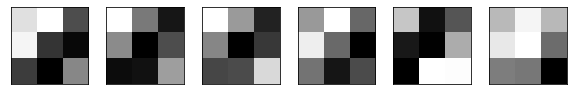

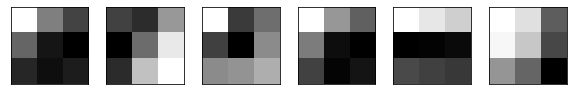

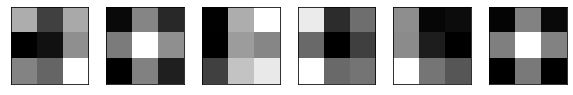

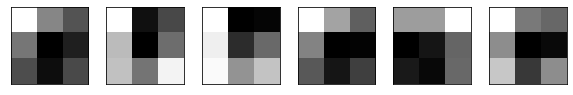

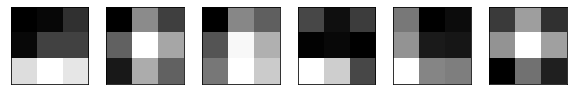

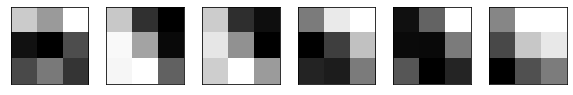

In [0]:
# cannot easily visualize filters lower down
# retrieve weights from the second hidden layer
filters, biases = model_vgg19.layers[2].get_weights()
# -----											----------

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)   
# plot first few filters
n_filters = 6
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	plt.figure(figsize=(10,10))	# set figure size
	for j in range(6):
		p_num = i*n_filters + j
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, n_filters, p_num+1)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
# show the figure
plt.show()

[[[[ 75.061      43.221      -0.6800003]
   [ 81.061      46.221       4.3199997]
   [ 82.061      49.221       7.3199997]
   ...
   [104.061      68.221      15.32     ]
   [100.061      64.221      12.32     ]
   [ 97.061      59.221      12.32     ]]

  [[ 79.061      46.221       4.3199997]
   [ 84.061      49.221       6.3199997]
   [ 86.061      55.221      11.32     ]
   ...
   [107.061      71.221      18.32     ]
   [105.061      69.221      17.32     ]
   [101.061      64.221      15.32     ]]

  [[ 82.061      49.221       7.3199997]
   [ 86.061      51.221       8.32     ]
   [ 87.061      55.221      11.32     ]
   ...
   [111.061      74.221      21.32     ]
   [107.061      71.221      19.32     ]
   [103.061      67.221      15.32     ]]

  ...

  [[  5.060997   -8.778999  -13.68     ]
   [  5.060997  -11.778999   -6.6800003]
   [  5.060997   -7.7789993  -8.68     ]
   ...
   [ 10.060997   15.221001    7.3199997]
   [ 26.060997   23.221       3.3199997]
   [ 54.060997  

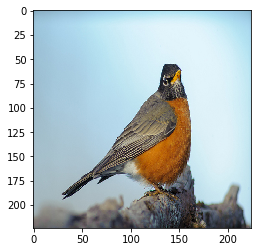

In [0]:
# load the image with the required shape
img = image.load_img(bird_file_path+'bird.jpg', target_size=(224, 224))
# check image
plt.imshow(img)

# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel for the vgg)
img = vgg19.preprocess_input(img)

print(img)


In [0]:
model_vgg19.layers[1].output

<tf.Tensor 'block1_conv1_1/Identity:0' shape=(None, 224, 224, 64) dtype=float32>

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
['block1_conv1']


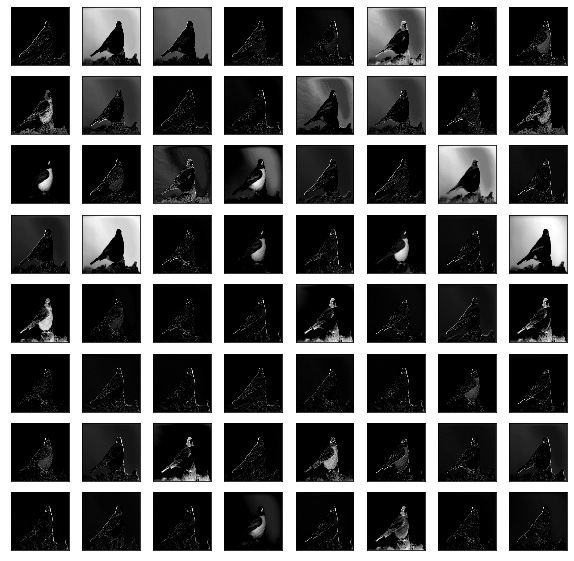

In [0]:
# plot feature map of first conv layer for given image

# redefine model to output right after the first hidden layer
model = Model(inputs=model_vgg19.inputs, outputs=model_vgg19.layers[1].output)
model.summary()
# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
print(model.output_names)
square(feature_maps, 8)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

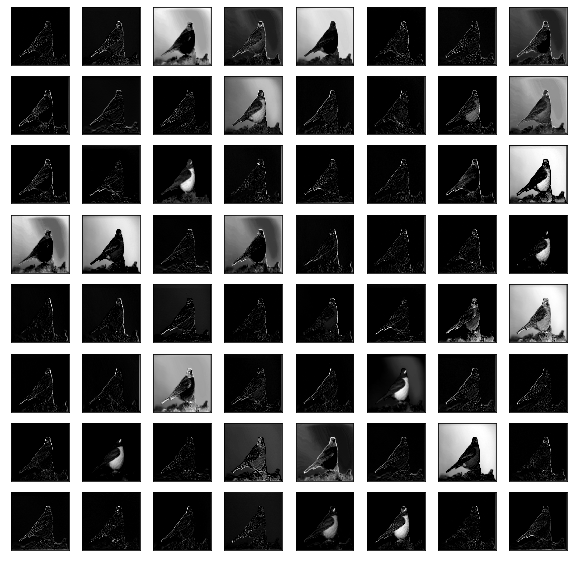

block2_conv2


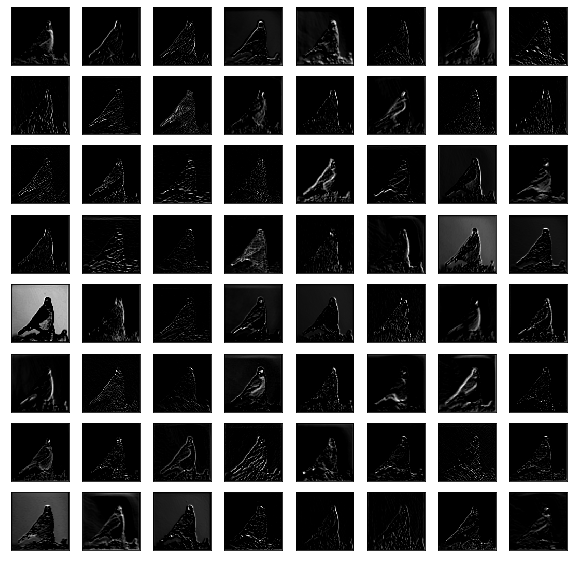

block3_conv3


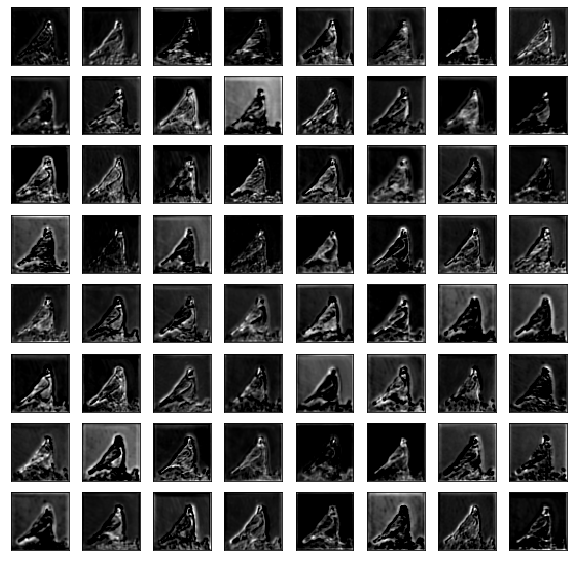

block4_conv2


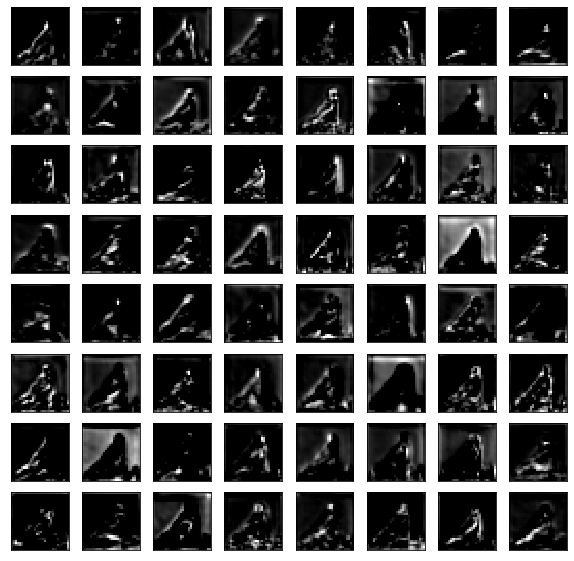

block5_conv1


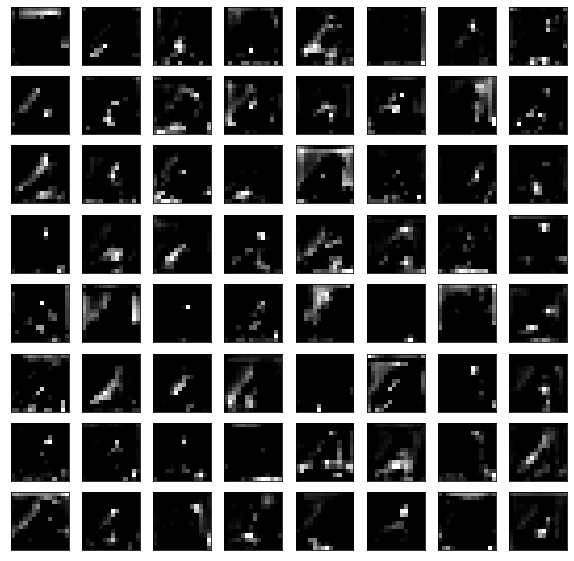

In [0]:
# visualize feature maps output from each block in the vgg model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model_vgg19.layers[i].output for i in ixs]
fm_model = Model(inputs=model_vgg19.inputs, outputs=outputs)
fm_model.summary()
# get feature map for first hidden layer
feature_maps = fm_model.predict(img)
# get feature maps names
layers_names = fm_model.output_names
# plot the output from each block
for i, fmap in enumerate(feature_maps):
  print(layers_names[i])
  square(fmap, 8)